# Criptomoedas
---
- SENAC/RESILIA - Formação em Análise de Dados (FAD) - Projeto em Grupo - Módulo 5
- !/usr/bin/env python3 - versão = 3.11(64-bit) - (-*- coding:utf-8-*-)
- Criado por: Cássio Cristiano Pereira Ribeiro | Diego de Arruda Nieto | Douglas Klem Portugal do Amaral | Stephanie Ferreira Vale
- Data de criação: 20/06/2023
---

# Contexto:

Nossa equipe representa a empresa Bender Inc, escalada por uma corretora financeira para realizar uma análise exploratória relacionada à série histórica dos valores de criptomoedas. As fontes de dados que serão utilizadas no projeto estão disponíveis no
Kaggle. Serão utilizados os arquivos correspondentes à toda a [série histórica](https://www.kaggle.com/datasets/klemdoug/top20coinmarketcapjune2023) do top 20 das criptomoedas, além dos arquivos dos últimos [30 dias](https://www.kaggle.com/datasets/klemdoug/top-20-crypto-last-30-days-june-2023-coinmarketcap) de cada token (consideramos 23/06/2023 o dia da extração desses arquivos).

# Questionamentos:

Como guia para o início dos insights, nos foram fornecidas algumas perguntas:

1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma tendência de queda ou de aumento?

2. Quais os valores médios para todas as criptomoedas?

3. Em quais anos houve maiores quedas e valorizações?

4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?

5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série histórica? E qual se mostra menos interessante?

6. Existe correlação entre os valores para todas as criptomoedas?


Além dessas questões, levantamos mais insights que são respondidos na montagem visual da análise (dashboard):

7. Existe um comportamento recente notável no último trimestre de 2022 que impactou/impactará o mercado de criptomoedas. Como se comportam as capitalizações nesse período? Existe alguma criptomoeda em destaque na tomada de decisões nesse período recente?

# Plano de Ação

## Tratamento dos Dados

In [1]:
# Importando as bibliotecas que necessitamos utilizar:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Se você utiliza o Google Colab, LEMBRE-SE de inserir esse dataset pelo diretório raiz da maneira correta previamente.
# Em caso de edições posteriores, o arquivo poderá se requisitado novamente pelo colab! Portanto, atenção a esse detalhe.
# No caso de você utilizar o ambiente Jupyter, tenha certeza de que ajustou o diretório para o caminho onde o dataset está salvo.

# Lendo os datasets das 20 criptomoedas da série histórica:
bitcoin = pd.read_csv('bitcoin.csv', sep=";")
ethereum = pd.read_csv('Ethereum.csv', sep=";")
tether = pd.read_csv('Tether.csv', sep=";")
bnb = pd.read_csv('BNB.csv', sep=";")
usdcoin = pd.read_csv('usdcoin.csv', sep=";")
xrp = pd.read_csv('xrp.csv', sep=";")
cardano = pd.read_csv('cardano.csv', sep=";")
dogecoin = pd.read_csv('dogecoin.csv', sep=";")
solana = pd.read_csv('solana.csv', sep=";")
litecoin = pd.read_csv('litecoin.csv', sep=";")
tron = pd.read_csv('tron.csv', sep=";")
polygon = pd.read_csv('polygon.csv', sep=";")
polkadot = pd.read_csv('polkadot.csv', sep=";")
wrapped = pd.read_csv('wrapped_bitcoin.csv', sep=";")
toncoin = pd.read_csv('toncoin.csv', sep=";")
dai = pd.read_csv('dai.csv', sep=";")
shibaino = pd.read_csv('shiba_inu.csv', sep=";")
avalanche = pd.read_csv('avalanche.csv', sep=";")
binance = pd.read_csv('binance_usd.csv', sep=";")
unus = pd.read_csv('unus_sed_leo.csv', sep=";")

In [3]:
# Criando uma nova coluna 'Moeda' para registrar os nomes de cada criptomoeda no dataset:
bitcoin['Moeda'] = "bitcoin"
ethereum['Moeda'] ="ethereum"
tether['Moeda'] = "tether"
bnb['Moeda'] = "bnb"
usdcoin['Moeda'] = "usdcoin"
xrp['Moeda'] = "xrp"
cardano['Moeda'] = "cardano"
dogecoin['Moeda'] = "dogecoin"
solana['Moeda'] = "solana"
litecoin['Moeda'] = "litecoin"
tron['Moeda'] = "tron"
polygon['Moeda'] = "polygon"
polkadot['Moeda'] = "polkadot"
wrapped['Moeda'] = "wrapped"
toncoin['Moeda'] = "toncoin"
dai['Moeda'] = "dai"
shibaino['Moeda'] = "shibaino"
avalanche['Moeda'] = "avalanche"
binance['Moeda'] = "binance"
unus['Moeda'] = "unus"

In [4]:
# Criando variável para salvar um dataset único concatenado com os dados das 20 criptomoedas:
criptomoedas = pd.concat([bitcoin,ethereum,tether,bnb,usdcoin,xrp,
                          cardano,dogecoin,solana,litecoin,tron,
                          polygon,polkadot,wrapped,toncoin,dai,
                          shibaino,avalanche,binance,unus], ignore_index= True)

In [5]:
# Lendo os datasets das 20 criptomoedas dos últimos 30 dias:
bitcoin30 = pd.read_csv('bitcoin30days.csv', sep=";")
ethereum30 = pd.read_csv('ethereum30days.csv', sep=";")
tether30 = pd.read_csv('tether30days.csv', sep=";")
bnb30 = pd.read_csv('bnb30days.csv', sep=";")
usdcoin30 = pd.read_csv('usd_coin30days.csv', sep=";")
xrp30 = pd.read_csv('xrp30days.csv', sep=";")
cardano30 = pd.read_csv('cardano30days.csv', sep=";")
dogecoin30 = pd.read_csv('dogecoin30days.csv', sep=";")
solana30 = pd.read_csv('solana30days.csv', sep=";")
litecoin30 = pd.read_csv('litecoin30days.csv', sep=";")
tron30 = pd.read_csv('tron30days.csv', sep=";")
polygon30 = pd.read_csv('polygon30days.csv', sep=";")
polkadot30 = pd.read_csv('polkadot30days.csv', sep=";")
wrapped30 = pd.read_csv('wrapped_bitcoin30days.csv', sep=";")
toncoin30 = pd.read_csv('toncoin30days.csv', sep=";")
dai30 = pd.read_csv('dai30days.csv', sep=";")
shibaino30 = pd.read_csv('shiba_inu30days.csv', sep=";")
avalanche30 = pd.read_csv('avalanche30days.csv', sep=";")
binance30 = pd.read_csv('binance_usd30days.csv', sep=";")
unus30 = pd.read_csv('unus_sed_leo30days.csv', sep=";")

In [6]:
# Criando uma nova coluna 'Moeda' para registrar os nomes de cada criptomoeda no dataset dos últimos 30 dias:
bitcoin30['Moeda'] = "bitcoin"
ethereum30['Moeda'] ="ethereum"
tether30['Moeda'] = "tether"
bnb30['Moeda'] = "bnb"
usdcoin30['Moeda'] = "usdcoin"
xrp30['Moeda'] = "xrp"
cardano30['Moeda'] = "cardano"
dogecoin30['Moeda'] = "dogecoin"
solana30['Moeda'] = "solana"
litecoin30['Moeda'] = "litecoin"
tron30['Moeda'] = "tron"
polygon30['Moeda'] = "polygon"
polkadot30['Moeda'] = "polkadot"
wrapped30['Moeda'] = "wrapped"
toncoin30['Moeda'] = "toncoin"
dai30['Moeda'] = "dai"
shibaino30['Moeda'] = "shibaino"
avalanche30['Moeda'] = "avalanche"
binance30['Moeda'] = "binance"
unus30['Moeda'] = "unus"

In [7]:
# Criando variável para salvar um dataset único concatenado com os dados das 20 criptomoedas nos últimos 30 dias:
criptomoedas_30days = pd.concat([bitcoin30,ethereum30,tether30,bnb30,usdcoin30,xrp30,
                          cardano30,dogecoin30,solana30,litecoin30,tron30,
                          polygon30,polkadot30,wrapped30,toncoin30,dai30,
                          shibaino30,avalanche30,binance30,unus30], ignore_index= True)

In [8]:
# Criando cópias de segurança para os datasets de série histórica e dos últimos 30 dias:
copy = criptomoedas.copy()
copy30  = criptomoedas_30days.copy()

In [9]:
# Convertendo as strings de data e hora presentes nas colunas 'timestamp' de copy e copy30 para
# somente a parte da data, removendo a parte do horário que não utilizaremos:
copy['timestamp'] = copy['timestamp'].apply(lambda x: x.split("T")[0]) # comando .apply() chamando a função lambda junto do comando .split() para
copy30['timestamp'] = copy30['timestamp'].apply(lambda x: x.split("T")[0]) # dividir a data em duas partes e retornar apenas o que queremos

In [10]:
# Substituindo os caracteres separadores de data nas colunas 'timestamp' de copy e copy30 utilizando os mesmos comandos do bloco anterior:
copy['timestamp'] = copy['timestamp'].apply(lambda x: x.replace("-", "/"))
copy30['timestamp'] = copy30['timestamp'].apply(lambda x: x.replace("-", "/")) # ex: passamos de 2010-01-07 para 2010/01/07

In [11]:
# Convertendo os valores nas colunas 'timestamp' de copy e copy30 para objetos de data e hora pela 
# função nativa do Pandas pd.to_datetime(); dayfirst=True foi o parâmetro utilizado para indicar que 
# o dia vem antes do mês na representação da data:
copy['timestamp'] = pd.to_datetime(copy['timestamp'], dayfirst= True) 
copy30['timestamp'] = pd.to_datetime(copy30['timestamp'], dayfirst= True)

In [12]:
# Criando um dicionário de tradução para renomear as colunas dos dataset ao nosso gosto:
traducao = {"open": "Abertura","high": "Alta", "low" : "Baixa", "close": "Fechamento", "volume" : "Volume", "marketcap": "Market_Cap",
            'timestamp' : "Data", "Moeda" : "Moeda"}

In [13]:
# Renomeando as colunas através do comando .rename() e indicando o dicionário anterior pelo parâmetro columns=traducao:
copy.rename(columns=traducao, inplace=True)
copy30.rename(columns=traducao, inplace=True)

In [14]:
# Criando uma lista para armazenar a ordem em que queremos a visualização das colunas nos datasets:
ordem_colunas = ["Moeda", "Data","Abertura","Alta","Baixa","Fechamento","Volume", "marketCap"]

In [15]:
# Modificando a ordem das colunas pelo comando .reindex() e indicando a lista anterior como parâmetro através de columns=ordem_colunas:
copy = copy.reindex (columns=ordem_colunas)
copy30 = copy30.reindex (columns=ordem_colunas)

In [16]:
# Verificando a consistência do tratamento feito até aqui chamando as duas linhas iniciais do dataset copy:
copy.head(2)

,Moeda,Data,Abertura,Alta,Baixa,Fechamento,Volume,marketCap
0,bitcoin,2010-07-13,0.108547,0.317349,0.251667,0.278197,132.398527,3.414605e+05
1,bitcoin,2010-07-19,0.376898,0.399870,0.330199,0.354749,2741.816665,1.225899e+06


In [17]:
# Verificando se os tipos de cada valor nas colunas do dataset copy se mantem de acordo com o que precisamos:
copy.dtypes

Moeda                 object
Data          datetime64[ns]
Abertura             float64
Alta                 float64
Baixa                float64
Fechamento           float64
Volume               float64
marketCap            float64
dtype: object

In [18]:
# Criando variáveis para armazenar a consulta específica (.query()) de cada criptomoeda (parâmetro: 'Moeda == "nome da criptomoeda"' ):
# (momento 1: variáveis de consulta à série histórica)
newbitcoin = copy.query('Moeda == "bitcoin"')
newethereum = copy.query('Moeda == "ethereum"')
newtether = copy.query('Moeda == "tether"')
newbnb = copy.query('Moeda == "bnb"')
newusd = copy.query('Moeda == "usdcoin"')
newxrp = copy.query('Moeda == "xrp"')
newcardano = copy.query('Moeda == "cardano"')
newdogecoin = copy.query('Moeda == "dogecoin"')
newsolana = copy.query('Moeda == "solana"')
newlitecoin = copy.query('Moeda == "litecoin"')
newtron = copy.query('Moeda == "tron"')
newpolygon = copy.query('Moeda == "polygon"')
newpolkadot = copy.query('Moeda == "polkadot"')
newwrapped = copy.query('Moeda == "wrapped"')
newtoncoin = copy.query('Moeda == "toncoin"')
newdai = copy.query('Moeda == "dai"')
newshibaino = copy.query('Moeda == "shibaino"')
newavalanche = copy.query('Moeda == "avalanche"')
newbinance = copy.query('Moeda == "binance"')
newunus = copy.query('Moeda == "unus"')

In [19]:
# Criando variáveis para armazenar a consulta específica (.query()) de cada criptomoeda (parâmetro: 'Moeda == "nome da criptomoeda"' ):
# (momento 2: variáveis de consulta aos últimos 30 dias)
newbitcoin30 = copy30.query('Moeda == "bitcoin"')
newethereum30 = copy30.query('Moeda == "ethereum"')
newtether30 = copy30.query('Moeda == "tether"')
newbnb30 = copy30.query('Moeda == "bnb"')
newusd30 = copy30.query('Moeda == "usdcoin"')
newxrp30 = copy30.query('Moeda == "xrp"')
newcardano30 = copy30.query('Moeda == "cardano"')
newdogecoin30 = copy30.query('Moeda == "dogecoin"')
newsolana30 = copy30.query('Moeda == "solana"')
newlitecoin30 = copy30.query('Moeda == "litecoin"')
newtron30 = copy30.query('Moeda == "tron"')
newpolygon30 = copy30.query('Moeda == "polygon"')
newpolkadot30 = copy30.query('Moeda == "polkadot"')
newwrapped30 = copy30.query('Moeda == "wrapped"')
newtoncoin30 = copy30.query('Moeda == "toncoin"')
newdai30 = copy30.query('Moeda == "dai"')
newshibaino30 = copy30.query('Moeda == "shibaino"')
newavalanche30 = copy30.query('Moeda == "avalanche"')
newbinance30 = copy30.query('Moeda == "binance"')
newunus30 = copy30.query('Moeda == "unus"')

In [20]:
# Ordenando os valores dos dataframes da série histórica com base na coluna "Data" (comando .sort_values()):
newbitcoin.sort_values("Data", inplace=True)
newethereum.sort_values("Data", inplace=True)
newtether.sort_values("Data", inplace=True)
newbnb.sort_values("Data", inplace=True)
newusd.sort_values("Data", inplace=True)
newxrp.sort_values("Data", inplace=True)
newcardano.sort_values("Data", inplace=True)
newdogecoin.sort_values("Data", inplace=True)
newsolana.sort_values("Data", inplace=True)
newlitecoin.sort_values("Data", inplace=True)
newtron.sort_values("Data", inplace=True)
newpolygon.sort_values("Data", inplace=True)
newpolkadot.sort_values("Data", inplace=True)
newwrapped.sort_values("Data", inplace=True)
newtoncoin.sort_values("Data", inplace=True)
newdai.sort_values("Data", inplace=True)
newshibaino.sort_values("Data", inplace=True)
newavalanche.sort_values("Data", inplace=True)
newbinance.sort_values("Data", inplace=True)
newunus.sort_values("Data", inplace=True)

In [21]:
# Ordenando os valores dos dataframes dos últimos 30 dias com base na coluna "Data" (comando .sort_values()):
newbitcoin30.sort_values("Data", inplace=True)
newethereum30.sort_values("Data", inplace=True)
newtether30.sort_values("Data", inplace=True)
newbnb30.sort_values("Data", inplace=True)
newusd30.sort_values("Data", inplace=True)
newxrp30.sort_values("Data", inplace=True)
newcardano30.sort_values("Data", inplace=True)
newdogecoin30.sort_values("Data", inplace=True)
newsolana30.sort_values("Data", inplace=True)
newlitecoin30.sort_values("Data", inplace=True)
newtron30.sort_values("Data", inplace=True)
newpolygon30.sort_values("Data", inplace=True)
newpolkadot30.sort_values("Data", inplace=True)
newwrapped30.sort_values("Data", inplace=True)
newtoncoin30.sort_values("Data", inplace=True)
newdai30.sort_values("Data", inplace=True)
newshibaino30.sort_values("Data", inplace=True)
newavalanche30.sort_values("Data", inplace=True)
newbinance30.sort_values("Data", inplace=True)
newunus30.sort_values("Data", inplace=True)

In [22]:
# Criando um dicionário de tradução para renomear os valores de dias da semana ao nosso gosto; esses últimos
# blocos de tratamento do código foram pensados exclusivamente para a resolução da Questão 4 do projeto:
traducao2 = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}


In [23]:
# Definindo uma função que retorna o dataframe com a nova coluna 'Dia_da_Semana', esta preenchida com o dia da semana
# correspondente à coluna 'Data'; o comando .dt.day_name() serve para obter o nome do dia da semana a partir de 'Data'.
def add_dias_semana(dataframe):
    dataframe['Dia_da_Semana'] = dataframe["Data"].dt.day_name()

In [24]:
# Definindo uma função que retorna os valores da coluna criada anteriormente renomeados ao nosso gosto:
def renomear_dias(df):
    df['Dia_da_Semana'] = df['Dia_da_Semana'].map(traducao2) # comando .map(): transforma os valores de 'Dia_da_Semana' com base no
                                                             # mapeamento pré-definido 'traducao2'

In [25]:
# Criando uma lista com as variáveis de todos os dataframes dos últimos 30 dias:
news = [newbitcoin30,newethereum30,newtether30,newbnb30,newusd30,newxrp30,newcardano30,newdogecoin30,newsolana30,newlitecoin30,newtron30,
        newpolygon30,newpolkadot30,newwrapped30,newtoncoin30,newdai30,newshibaino30,newavalanche30,newbinance30,newunus30]

In [26]:
# Percorrendo a lista criada anteriormente para aplicar a função add_dias_semana(dataframe) individualmente em cada dataframe:
for df in news:
    df = add_dias_semana(df)

In [27]:
# Percorrendo a lista criada anteriormente para aplicar a função renomear_dias(df) individualmente em cada dataframe:
for df in news:
    df = renomear_dias(df)

In [28]:
# Agrupando (.groupby()) os dados de cada criptomoeda dos últimos 30 dias e armazenando-os em variáveis correspondentes 
# e de forma individual, salvando a média desses valores (.mean()) em ordem crescente (.sort_values()) e baseando-se na 'Data:
data_Bitcoin = newbitcoin30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_ethereum = newethereum30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_ntether = newtether30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_bnb = newbnb30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_usd = newusd30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_xrp = newxrp30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_cardano = newcardano30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_dogecoin = newdogecoin30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_solano = newsolana30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_litecoin = newlitecoin30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_tron = newtron30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_polygon = newpolygon30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_polkadot = newpolkadot30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_wrapped = newwrapped30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_toncoin = newtoncoin30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_dai = newdai30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_shibaino = newshibaino30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_avalanche = newavalanche30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_binance = newbinance30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')
data_unus = newunus30[['Data','Dia_da_Semana', 'Abertura']].groupby(['Data','Dia_da_Semana']).mean().sort_values(by = 'Data')

## Insights Iniciais

### 1. Comportamento dos valores de todas as criptomoedas: houve tendência de queda ou de aumento?

Para conseguirmos visualizar os momentos onde houveram queda e aumento relevantes, configuramos para mostrar toda a série histórica através do gráfico de linhas múltiplas:

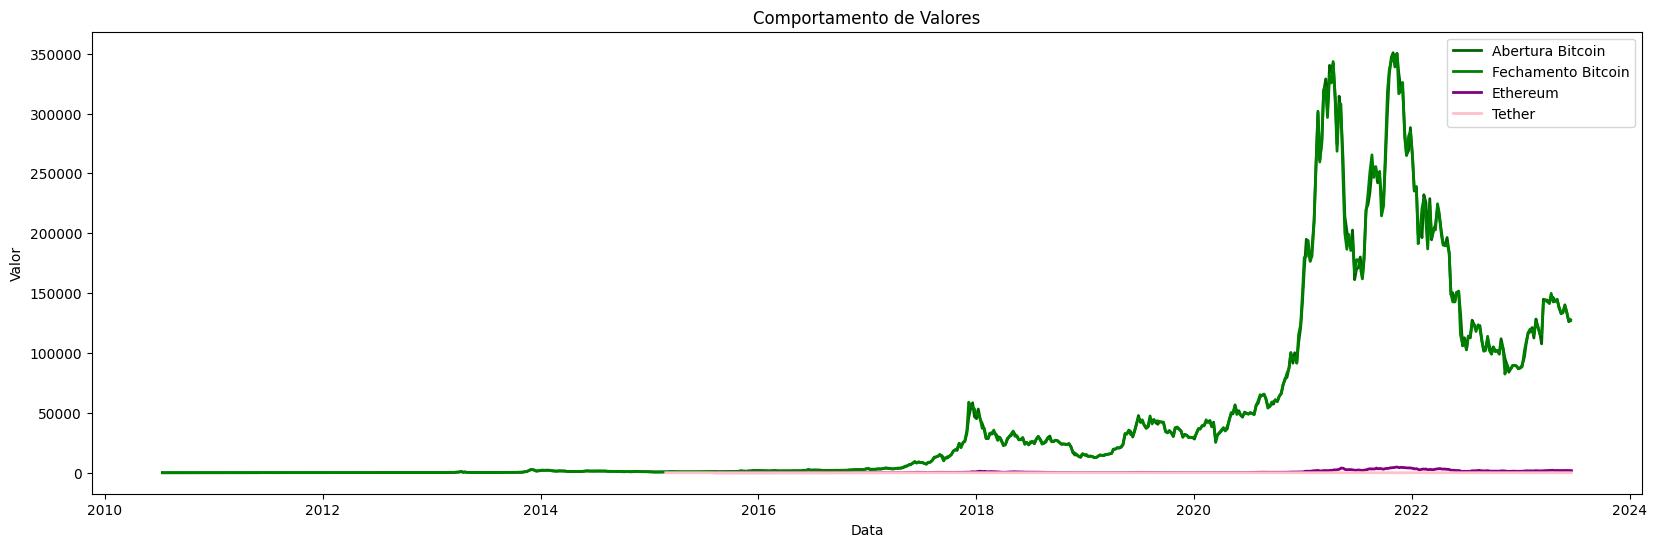

In [34]:
# Criando o gráfico de linhas:
# Figuras e eixos pelas variáveis fig e ax do matplotlib
fig, ax = plt.subplots(figsize=(20, 6))
# Utilizamos os dados de abertura e fechamento do bitcoin pra demonstrar que possuem comportamentos praticamente idênticos
ax.plot(newbitcoin['Data'], newbitcoin['Abertura'], label='Abertura Bitcoin', color='darkgreen', linewidth=2)
ax.plot(newbitcoin['Data'], newbitcoin['Fechamento'], label='Fechamento Bitcoin', color='green', linewidth=2)
# Em seguida, escolhemos Ethereum e Tether para representar as dimensões das demais criptomoedas comparadas ao Bitcoin
ax.plot(newethereum['Data'], newethereum['Abertura'], label='Ethereum', color='purple', linewidth=2)
ax.plot(newtether['Data'], newtether['Abertura'], label='Tether', color='pink', linewidth=2)

# Adicionando legendas e título:
ax.legend()
ax.set_xlabel('Data') # plotagem do eixo horizontal (anos)
ax.set_ylabel('Valor') # plotagem do eixo vertical (valor dos tokens em milhares)
ax.set_title('Comportamento de Valores') # título do gráfico

# Mostrando o gráfico:
plt.show()

É importante escolhermos métodos adequados para o tratamento estatístico de valores monetários, por isso utilizamos a Regressão Linear para a identificação de tendências.

A relação identificada pela regressão linear entre o tempo e os preços das criptomoedas permite, além disso, fazer previsões sobre os preços futuros. No entanto, MUITA ATENÇÃO: a previsão de preços de criptomoedas é um desafio, pois elas são altamente voláteis e influenciadas por vários fatores externos de natureza corporativa e/ou sociopolítica.

Fora o tempo, a regressão linear permite que analisemos o impacto de outras variáveis independentes nos preços das criptomoedas, levando em consideração variáveis dependentes daquelas (veremos esse cruzamento de informações para questões seguintes). 

No bloco de código abaixo, utilizamos o modelo linear já incluso no scikit-learn (sklearn.linear_model):

In [35]:
# Selecionando as colunas necessárias para o cálculo de regressão linear:
x=newbitcoin[['Abertura', 'Alta', 'Baixa']] # variáveis independentes
y=newbitcoin['Fechamento'] # variável dependente, base para a plotagem

# Criando o modelo:
modelo=LinearRegression()

# Treinando o modelo:
modelo.fit(x, y) # .fit(): esse método encontra parâmetros ótimos para plotagem de acordo com as variáveis que fornecemos

# Realizando previsões:
previsao=modelo.predict(x) # .predict(): utiliza o aprendizado do .fit() anterior, respondendo um array-vetor com valores numéricos contínuos
    
# Verificando se a tendência é de aumento ou de queda por condicional:
if previsao[-1] > previsao[0]:
    print("Tendência de aumento")
else:
    print("Tendência de queda")

Tendência de aumento


### 2. Valores médios para todas as criptomoedas

Nesse caso, focamos na média de alta/baixa e de abertura/fechamento, pois esses valores são comparativos interessantes para averiguar tendências de (des)valorização, volatilidade e indicadores de resistência a valores de alta e/ou baixa. O volume monetário de transações normalmente é verificado de forma absoluta para observar padrões de demanda e circulação da moeda.

In [36]:
# Criando o dicionário para armazenar os valores médios de Abertura, Alta, Baixa e Fechamento para cada criptomoeda:
criptomoedas = { # dicionário categórico com os nomes
    "Bitcoin": newbitcoin,
    "Ethereum": newethereum,
    "Tether": newtether,
    "BNB": newbnb,
    "USD": newusd,
    "XRP": newxrp,
    "Cardano": newcardano,
    "Dogecoin": newdogecoin,
    "Solana": newsolana,
    "Litecoin": newlitecoin,
    "Tron": newtron,
    "Polygon": newpolygon,
    "Polkadot": newpolkadot,
    "Wrapped": newwrapped,
    "Toncoin": newtoncoin,
    "Dai": newdai,
    "ShibaInu": newshibaino,
    "Avalanche": newavalanche,
    "Binance": newbinance,
    "Unus": newunus
}

valores_medios = {} # dicionário quantitativo que irá recebear as médias

for nome, dados in criptomoedas.items(): # loop de iteração para armazenar as médias de acordo com cada criptomoeda
    valores_medios[nome] = [
        dados['Abertura'].mean().round(2),
        dados['Alta'].mean().round(2),
        dados['Baixa'].mean().round(2),
        dados['Fechamento'].mean().round(2)
    ]

In [44]:
# Criando um dataframe a partir do dicionário anterior
Medias = pd.DataFrame(valores_medios, index= ['Abertura',"Alta","Baixa", "Fechamento"])
Medias

,Bitcoin,Ethereum,Tether,BNB,USD,XRP,Cardano,Dogecoin,Solana,Litecoin,Tron,Polygon,Polkadot,Wrapped,Toncoin,Dai,ShibaInu,Avalanche,Binance,Unus
Abertura,45857.45,860.63,1.00,151.44,1.00,0.31,0.47,0.04,46.41,59.83,0.05,0.64,15.92,24014.74,1.87,1.00,0.0,33.03,1.0,2.69
Alta,46844.00,887.72,1.01,156.49,1.01,0.32,0.49,0.04,48.53,62.28,0.05,0.67,16.60,24648.49,1.94,1.01,0.0,34.82,1.0,2.76
Baixa,44694.72,829.67,1.00,146.65,1.00,0.30,0.45,0.03,44.20,57.14,0.04,0.61,15.09,23389.14,1.80,1.00,0.0,31.43,1.0,2.64
Fechamento,45766.01,861.43,1.00,152.26,1.00,0.31,0.47,0.04,46.36,59.89,0.05,0.64,15.87,24023.86,1.87,1.00,0.0,33.12,1.0,2.69


In [47]:
# Fazendo a transposição de linhas e colunas do dataframe anterior
Medias.T # A transposição fornece um dataframe que responde ao questionamento dessa seção, como segue abaixo:

,Abertura,Alta,Baixa,Fechamento
Bitcoin,45857.45,46844.00,44694.72,45766.01
Ethereum,860.63,887.72,829.67,861.43
Tether,1.00,1.01,1.00,1.00
BNB,151.44,156.49,146.65,152.26
USD,1.00,1.01,1.00,1.00
XRP,0.31,0.32,0.30,0.31
Cardano,0.47,0.49,0.45,0.47
Dogecoin,0.04,0.04,0.03,0.04
Solana,46.41,48.53,44.20,46.36
Litecoin,59.83,62.28,57.14,59.89


### 3. Anos com maiores quedas e valorizações

Para responder a esta seção, é importante ressaltar o conceito de uma criptomoeda ser considerada valorizada ou desvalorizada: é um valor quantitativo baseado na diferença entre os valores de fechamento e os valores de abertura. Dado EXTREMAMENTE necessário para avaliar o desempenho da moeda durante os anos e seu potencial de investimento por parte de acionistas. Estes acompanham fervorosamente as oscilações de valorização para tomadas de decisão de compra e vendas dos tokens. Além disso, por ser um mercado estipulativo, as tendências de valorização fornecem indicadores de estabilidade ou volatilidade, que calculamos abaixo:

In [48]:
# Criando uma lista para armazenar os datasets de cada criptomoeda já tratados em seções anteriores:
moedas = [newbitcoin,newethereum,newtether,newbnb,newusd,newxrp,
                          newcardano,newdogecoin,newsolana,newlitecoin,newtron,
                          newpolygon,newpolkadot,newwrapped,newtoncoin,newdai,
                          newshibaino,newavalanche,newbinance,newunus]

In [49]:
# Executando loop para adicionar a coluna 'Ano' em cada dataframe, contendo o ano correspondente extraído da coluna 'Data':
for df in moedas:
     df['Ano'] = df['Data'].dt.year # extração do ano pelo comando .dt.year 

In [50]:
# Executando loop para adicionar a coluna 'Diferenca' em cada dataframe:
for df in moedas:
    df['Diferenca'] = df['Fechamento'] - df['Abertura']  # cada linha dessa coluna armazena a subtração (fechamento-abertura)

In [65]:
# Criando dicionário para formatar os nomes das criptomoedas ao nosso gosto:
nomes_variaveis = {
    'newbitcoin': 'bitcoin',
    'newethereum': 'ethereum',
    'newtether': 'tether',
    'newbnb': 'bnb',
    'newusd': 'usd',
    'newxrp': 'xrp',
    'newcardano': 'cardano',
    'newdogecoin': 'dogecoin',
    'newsolana': 'solana',
    'newlitecoin': 'litecoin',
    'newtron': 'tron',
    'newpolygon': 'polygon',
    'newpolkadot': 'polkadot',
    'newwrapped': 'wrapped',
    'newtoncoin': 'toncoin',
    'newdai': 'dai',
    'newshibaino': 'shibainu',
    'newavalanche': 'avalanche',
    'newbinance': 'binance',
    'newunus': 'unus'
}
# Obtendo o nome da variável na lista anterior 'moedas':
nome_variavel = next(key for key, value in globals().items() if value is df) # o comando globals() permite acesso a todas as variáveis
                                                                             # globais definidas até o momento da chamada
    
# Verificando se 'nome_variavel' está presente no dicionário 'nomes_variaveis':
if nome_variavel in nomes_variaveis:
    nome_variavel_final = nomes_variaveis[nome_variavel] + 'qv' # associando com 'qv' para poder evocar cada criptomoeda com as alterações
    globals()[nome_variavel_final] = df[['Ano', 'Data', 'Diferenca']]
    globals()[nome_variavel_final].sort_values(by='Diferenca', ascending=False, inplace=True)

Abaixo segue a impressão final das variáveis para visualização das respostas dessa seção. Por praticidade, serão utilizadas como exemplo apenas criptomoedas que foram consideradas revelantes para o *storytelling*, sendo a consulta realizada partindo-se do mesmo padrão no nome da variável ('nome_da_criptomoeda + qv').

In [74]:
bitcoinqv # dataframe do bitcoin mostrando as maiores valorizações (índice 0) e (des)valorizações/queda (índice -1) com
# seus respectivos anos

,Ano,Data,Diferenca
653,2022,2022-02-04,24825.843045
626,2021,2021-08-13,17398.728413
635,2021,2021-10-11,16824.568391
418,2017,2017-12-07,12741.358353
627,2021,2021-08-20,12437.019026
...,...,...,...
614,2021,2021-05-28,-15181.936692
655,2022,2022-02-17,-16044.127154
612,2021,2021-05-15,-16318.309482
641,2021,2021-11-18,-17307.851781


In [75]:
ethereumqv # dataframe do ethereum mostrando as maiores valorizações (índice 0) e (des)valorizações/queda (índice -1) com
# seus respectivos anos

,Ano,Data,Diferenca
1340,2022,2022-02-28,298.029079
1264,2021,2021-05-05,282.228597
1310,2021,2021-11-02,262.297612
1287,2021,2021-08-04,216.075059
1294,2021,2021-08-31,205.974749
...,...,...,...
1267,2021,2021-05-17,-298.945145
1268,2021,2021-05-21,-341.719891
1276,2021,2021-06-21,-356.870372
1299,2021,2021-09-20,-370.677211


In [77]:
cardanoqv # dataframe do cardano mostrando as maiores valorizações (índice 0) e (des)valorizações/queda (índice -1) com
# seus respectivos anos

,Ano,Data,Diferenca
4417,2018,2018-01-03,0.299979
4849,2021,2021-05-24,0.233248
4850,2021,2021-05-26,0.228239
4813,2021,2021-02-10,0.226770
4825,2021,2021-03-16,0.209711
...,...,...,...
4914,2021,2021-11-26,-0.147967
4882,2021,2021-08-26,-0.205638
4845,2021,2021-05-12,-0.210730
4859,2021,2021-06-21,-0.249548


In [78]:
shibainuqv # dataframe do shiba inu mostrando as maiores valorizações (índice 0) e (des)valorizações/queda (índice -1) com
# seus respectivos anos

,Ano,Data,Diferenca
11940,2021,2021-10-27,0.000032
11821,2021,2021-05-08,0.000013
11926,2021,2021-10-06,0.000011
11963,2021,2021-11-29,0.000006
11939,2021,2021-10-25,0.000006
...,...,...,...
11829,2021,2021-05-19,-0.000006
11942,2021,2021-10-30,-0.000010
11941,2021,2021-10-28,-0.000011
11824,2021,2021-05-12,-0.000013


### 4. Tendência de aumento ou de queda dos valores pelo dia da semana

Dados referentes à intervalos semanais também seguem o mesmo raciocínio de fornecer informações interessantes para a tomada de decisões de compra e venda de tokens, pois podemos identificar padrões de queda ou alta em um dia da semana específico. Seguimos, também, pelo tratamento de regressão linear para adicionar previsões de tendência dos 7 dias posteriores à amostragem que temos:

In [80]:
# Armazenando em variáveis a consulta do dataset dos últimos 30 dias da criptomoeda de acordo com os dias da semana:
segunda_bitcoin = newbitcoin30.query('Dia_da_Semana == "Segunda-feira"') #teste inicial com os dias do bitcoin
terca_bitcoin = newbitcoin30.query('Dia_da_Semana == "Terça-feira"')
quarta_bitcoin = newbitcoin30.query('Dia_da_Semana == "Quarta-feira"')
quinta__bitcoin = newbitcoin30.query('Dia_da_Semana == "Quinta-feira"')
sexta_bitcoin = newbitcoin30.query('Dia_da_Semana == "Sexta-feira"')
sabado_bitcoin = newbitcoin30.query('Dia_da_Semana == "Sábado"')
domingo__bitcoin = newbitcoin30.query('Dia_da_Semana == "Domingo"')

In [81]:
# Criando uma lista para salvar as variáveis anteriores:
dias = [segunda_bitcoin,terca_bitcoin,quarta_bitcoin,quinta__bitcoin,sexta_bitcoin,sabado_bitcoin,domingo__bitcoin]

In [82]:
# Criando uma lista para salvar os nomes dos dias da semana: 
dias_nomes = ["Segunda-Feira", "Terça-Feira","Quarta-Feira","Quinta-Feira","Sexta-Feira","Sábado","Domingo" ]

In [83]:
# Definindo uma função para calcular a tendência por regressão linear:
def tendencia(dataframes, nomes):
    for df, nome in zip(dataframes, nomes):
        x=df[['Abertura', 'Alta', 'Baixa']] # variáveis independentes
        y=df['Fechamento'] # variável dependente das anteriores

        modelo=LinearRegression()

        modelo.fit(x, y)

        previsao= modelo.predict(x)

        if previsao[-1] > previsao[0]:
            print(f"{nome} tem tendência de aumento.\n")
        else:
            print(f"{nome} tem tendência de queda.\n")

In [84]:
# Impressão do tratamento anterior:
tendencia(dias,dias_nomes)

Segunda-Feira tem tendência de queda.

Terça-Feira tem tendência de queda.

Quarta-Feira tem tendência de aumento.

Quinta-Feira tem tendência de aumento.

Sexta-Feira tem tendência de aumento.

Sábado tem tendência de aumento.

Domingo tem tendência de queda.



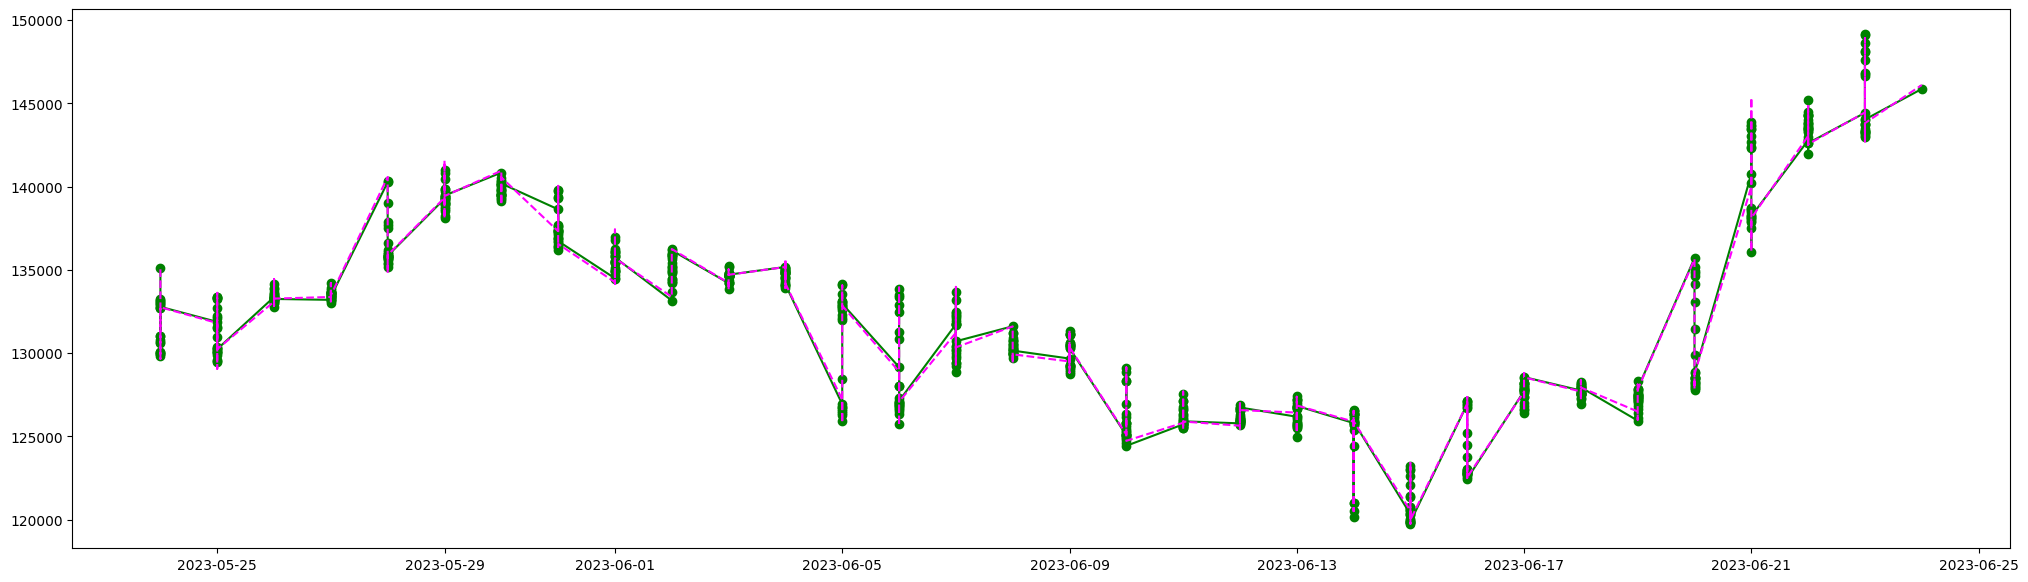

In [91]:
# Criando o gráfico de regressão linear para a plotagem das tendências semanais:
df = newbitcoin30 # Equação para facilitar a troca do banco de dados quando for conveniente. Para fins de testes práticos,
                # utilizamos o bitcoin como referencial
x=df[['Abertura', 'Alta', 'Baixa']]
y=df['Fechamento']

modelo=LinearRegression()

modelo.fit(x, y)

previsao=modelo.predict(x)

plt.figure(figsize=(25,7))
plt.plot(df['Data'], df['Fechamento'], 'go-', label='Dados Originais')
plt.plot(df['Data'], previsao, color=(1.0, 0.0, 1.0), linestyle='--', label='Previsões')

plt.show()

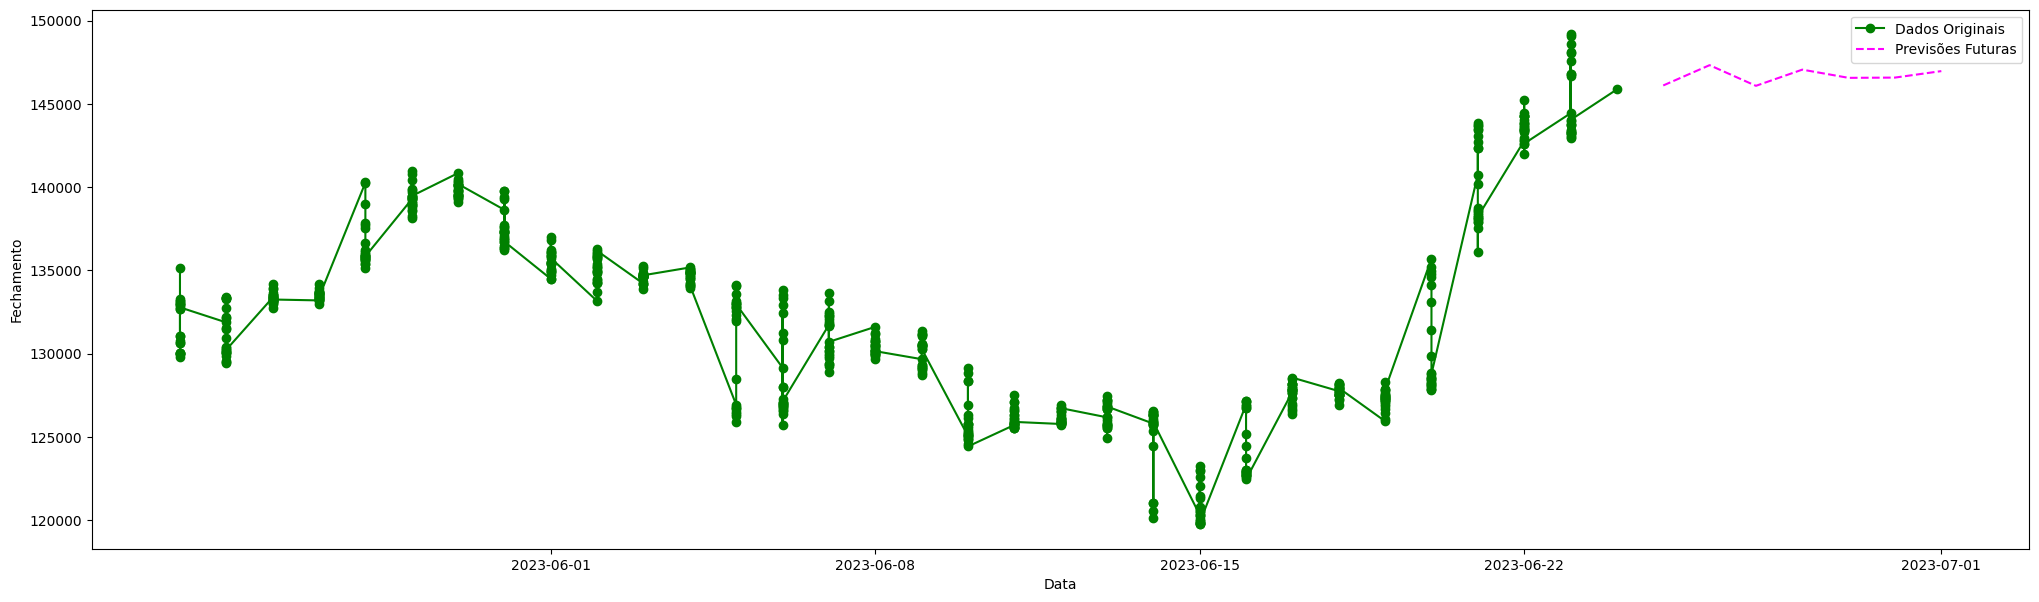

In [93]:
# Criando o gráfico de regressão linear para a previsão de sete dias futuros à amostra:
# Utilizamos o bitcoin como teste de referência:
df = newbitcoin30

x=df[['Abertura', 'Alta', 'Baixa']]
y=df['Fechamento']

modelo=LinearRegression()

modelo.fit(x, y)
# Fazendo as previsões:
num_dias_futuros=7  # Número de dias para fazer as previsões
# Armazenando últimos valores das colunas em x:
ultimos_valores=x.tail(1)
# Criando uma lista vazia para armazenar as previsões de fechamento:
previsao_fechamento=[] 

for i in range(num_dias_futuros): # looping para geração dos dados de previsão
    # Fazendo a previsão com base em últimos_valores:
    proximo_dia=modelo.predict(ultimos_valores)[0]
    previsao_fechamento.append(proximo_dia)

    # Atualizando os últimos valores conhecidos para a próxima iteração:
    ultimos_valores = pd.DataFrame([[proximo_dia] + list(ultimos_valores.values[0][:-1])], columns=['Abertura', 'Alta', 'Baixa'])

# Criando datas para as previsões futuras:
ultima_data = pd.to_datetime(df['Data'].tail(1).values[0])
datas_futuras = pd.date_range(start=ultima_data + pd.Timedelta(days=1), periods=num_dias_futuros, freq='D')

# Plotando os dados originais e as previsões:
plt.figure(figsize=(25,7))
plt.plot(df['Data'], df['Fechamento'], 'go-', label='Dados Originais')
plt.plot(datas_futuras, previsao_fechamento, color=(1.0, 0.0, 1.0), linestyle='--', label='Previsões Futuras')

plt.legend()
plt.xlabel('Data')
plt.ylabel('Fechamento')

plt.show()

### 5. Moedas que se mostraram mais e menos interessantes em relação à valorização pela análise da série histórica

O conceito de interessante para criptomoedas precisa ser entendido considerando fatores sociopolíticos e conceitos de valorização abordados nas seções anteriores.

*“Subir os juros é muito caro para os países, e pode levar a uma recessão que ninguém quer que aconteça. Então não existe essa história de subir juros indefinidamente...” [...] “As pessoas vão olhar quanto está a inflação e quanto rende a renda fixa, ver que a conta não fecha (o Brasil é exceção), e vão ter que migrar pelo menos parte dos investimentos, voltar a tomar risco em renda variável, em criptoativos.” (InfoMoney)*

Pelo referencial bibliográfico utilizado, tomamos como ponto de partida para essa questão o último triênio registrado da série histórica (ressalvas a 2023 por só termos, até o momento de apresentação desse projeto, dados de 01/01/2023 até 23/06/2023).

In [98]:
# Criando a coluna 'Ano' para armazenar apenas o valor de ano extraído das datas e ter variáveis cruzando dados com esses anos em específico:
copy['Ano'] = copy['Data'].dt.year
ano_2023 = copy.query('Ano == 2023') 
ano_2022 = copy.query('Ano == 2022')
ano_2021 = copy.query('Ano == 2021')

In [100]:
# Criando a coluna 'Mes' para armazenar os valores de meses extraídos das datas pelo comando .dt.moth:
ano_2023['Mes'] = ano_2023['Data'].dt.month
ano_2022['Mes'] = ano_2022['Data'].dt.month
ano_2021['Mes'] = ano_2021['Data'].dt.month

In [102]:
# Armazenando em outra variável a consulta pelo último trimestre plotável de 2023 (teste):
ult_trimestre = ano_2023.query('Mes == 6 | Mes == 5 | Mes == 4')
ult_trimestre.head() # verificando as colunas do dataset

,Moeda,Data,Abertura,Alta,Baixa,Fechamento,Volume,marketCap,Ano,Mes
719,bitcoin,2023-04-07,141871.565073,142239.039699,140623.904023,141207.108099,5.495793e+10,2.732729e+12,2023,4
720,bitcoin,2023-04-13,147027.468926,149962.862162,146958.003111,149809.639054,8.601337e+10,2.892493e+12,2023,4
721,bitcoin,2023-04-20,146314.778946,147580.181162,141638.616212,142628.112924,1.083279e+11,2.774711e+12,2023,4
722,bitcoin,2023-04-26,143045.479608,151601.967318,138213.033785,143381.185274,1.610105e+11,2.780942e+12,2023,4
723,bitcoin,2023-05-03,144543.984406,146171.821187,141156.823085,144912.583487,9.637598e+10,2.830660e+12,2023,5


In [106]:
# Armazenando as variáveis de consulta em uma variável fixa de teste (df):
df = ult_trimestre
# Calculando a diferença entre os valores de fechamento e abertura para ter a valorização da moeda:
df['Diferenca']=df['Fechamento']-df['Abertura']
# Calculando a média dessa diferença para cada moeda:
media_valorizacao = df.groupby('Moeda')['Diferenca'].mean() # agrupamento (.groupby()) pelo nome da criptomoeda e calculando a média (.mean()) após isso
df['Porcentagem'] = (df['Diferenca'] / df['Abertura']) * 100 # convertendo as informações de valorização para percentuais e salvando numa nova coluna 'Porcentagem'.
# Salvando numa variável final o dataframe com os nomes das criptomoedas e seus respectivos dados de valorização, porcentagem e volume:
interessantes=df[['Moeda','Diferenca','Porcentagem', 'Volume']].groupby('Moeda').mean().sort_values(by='Porcentagem', ascending=False)
display(interessantes) # Impressão do dataframe-resposta dessa seção

,Diferenca,Porcentagem,Volume
Moeda,,,
ethereum,1.342462e+01,0.728589,7.028416e+09
wrapped,1.039242e+02,0.413078,1.364465e+08
dogecoin,2.018223e-04,0.219556,4.914479e+08
xrp,4.627018e-04,0.136248,1.103306e+09
dai,6.037244e-05,0.006047,1.361880e+08
usdcoin,3.982096e-05,0.003983,3.783356e+09
binance,3.373949e-05,0.003378,2.447845e+09
unus,-1.388923e-04,-0.002924,7.071316e+05
tether,-5.497038e-05,-0.005493,2.447321e+10


### 6. Correlação entre os valores para todas as criptomoedas

Houve uma predileção justificável pelo cálculo da correlação entre as colunas de criptomoedas tendendo à visualização por HEATMAP (mapa de calor) do que por gráficos de dispersão. O mapa de calor é uma representação visual intuitiva, onde as cores podem ser usadas para indicar diferentes níveis de intensidade ou valor. Em contraste, um gráfico de dispersão pode se tornar confuso e difícil de interpretar, especialmente quando há muitos pontos ou sobreposição entre eles (no nosso caso, haveriam no mínimo 20). O uso de cores em um mapa de calor também permite que se identifiquem rapidamente áreas de maior ou menor interesse em relação às criptomoedas, facilitando a análise e a tomada de decisões.

In [107]:
# Criando uma variável para armazenar as colunas com dados quantitativos de interesse para o cálculo de correlação:
correlacao = newbitcoin[['Abertura','Alta','Baixa','Fechamento','Volume']]

In [108]:
# Impressão do comando de correlação (.corr())
correlacao.corr()

,Abertura,Alta,Baixa,Fechamento,Volume
Abertura,1.000000,0.999721,0.999506,0.999316,0.682118
Alta,0.999721,1.000000,0.999420,0.999635,0.684365
Baixa,0.999506,0.999420,1.000000,0.999612,0.675354
Fechamento,0.999316,0.999635,0.999612,1.000000,0.679346
Volume,0.682118,0.684365,0.675354,0.679346,1.000000


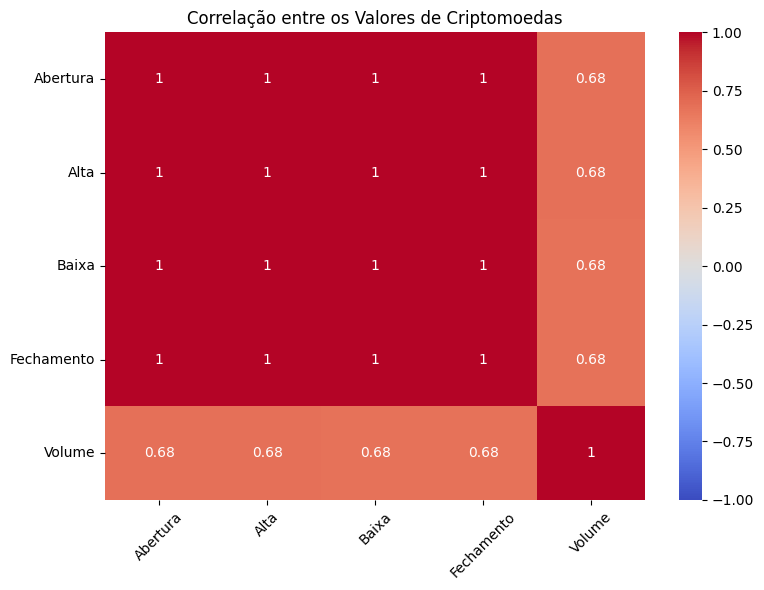

In [110]:
# Configurando o mapa de calor:
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# Configurando os eixos:
plt.title('Correlação entre os Valores de Criptomoedas')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Exibindo o mapa de calor:
plt.show()

In [29]:
moedas_puras=[bitcoin,ethereum,tether,bnb,usdcoin,xrp,
                          cardano,dogecoin,solana,litecoin,tron,
                          polygon,polkadot,wrapped,toncoin,dai,
                          shibaino,avalanche,binance,unus]
moedas_puras_nomes=['bitcoin','ethereum','tether','bnb','usdcoin','xrp',
                          'cardano','dogecoin','solana','litecoin','tron',
                          'polygon','polkadot','wrapped','toncoin','dai',
                          'shibaino','avalanche','binance','unus']

In [32]:
# Criando um novo DataFrame para armazenar as informações de 'close' e nome da moeda:
correlation_df = pd.DataFrame()

# Iterar sobre cada DataFrame na lista 'moedas_puras':
for i, moeda_df in enumerate(moedas_puras):
    # Obtendo o nome da moeda
    nomemoeda = f'Moeda{i+1}'
    # Obtendo a coluna 'close' do DataFrame da moeda
    close_column = moeda_df['close']
    # Adicionando a coluna 'close' no novo DataFrame com o nome da moeda como coluna
    correlation_df[nomemoeda] = close_column

#Calculando a correlação entre as colunas (moedas) com base na coluna 'close':
correlacao_matrix = correlation_df.corr()

correlacao_matrix.columns = moedas_puras_nomes
correlacao_matrix.index = moedas_puras_nomes

correlacao_matrix

,bitcoin,ethereum,tether,bnb,usdcoin,xrp,cardano,dogecoin,solana,litecoin,tron,polygon,polkadot,wrapped,toncoin,dai,shibaino,avalanche,binance,unus
bitcoin,1.000000,0.607253,-0.038299,0.467181,-0.231215,0.533998,0.103475,0.648759,-0.194412,0.483631,0.392723,0.294254,-0.434331,0.010760,0.067803,-0.195000,-0.029505,-0.262834,-0.094680,0.469663
ethereum,0.607253,1.000000,-0.034335,0.721749,-0.284172,0.541041,0.359076,0.785527,-0.199399,0.621236,0.509490,0.255011,-0.461787,0.079198,0.212175,-0.228091,-0.060558,-0.275969,-0.126595,0.715734
tether,-0.038299,-0.034335,1.000000,-0.033187,-0.039868,-0.003886,-0.023450,-0.030699,0.092390,0.075515,-0.042048,0.024016,-0.097167,0.068220,-0.085790,-0.062158,0.055017,0.040275,-0.012200,-0.004537
bnb,0.467181,0.721749,-0.033187,1.000000,-0.326596,0.351407,0.766897,0.441131,-0.088326,0.439232,0.787913,0.628975,-0.558031,0.442129,0.236054,-0.269178,-0.039402,-0.353806,-0.141699,0.864116
usdcoin,-0.231215,-0.284172,-0.039868,-0.326596,1.000000,-0.320507,-0.185974,-0.184713,-0.269943,-0.315350,-0.207775,-0.371163,-0.085502,-0.393079,-0.217763,0.105701,-0.302019,-0.289697,0.249343,-0.363210
xrp,0.533998,0.541041,-0.003886,0.351407,-0.320507,1.000000,0.121611,0.643715,0.344135,0.780412,0.208536,0.330752,-0.155905,0.361021,-0.113924,-0.249708,0.466511,0.146438,-0.136306,0.509341
cardano,0.103475,0.359076,-0.023450,0.766897,-0.185974,0.121611,1.000000,0.109095,-0.002275,0.226008,0.750168,0.644070,-0.460047,0.526459,0.186127,-0.211988,-0.020568,-0.360120,-0.054464,0.762531
dogecoin,0.648759,0.785527,-0.030699,0.441131,-0.184713,0.643715,0.109095,1.000000,-0.176675,0.655295,0.310984,0.170917,-0.364405,-0.051564,0.142787,-0.158807,-0.046203,-0.217822,-0.080108,0.484732
solana,-0.194412,-0.199399,0.092390,-0.088326,-0.269943,0.344135,-0.002275,-0.176675,1.000000,0.342952,-0.127248,0.448036,0.236003,0.760317,-0.332936,-0.195034,0.768354,0.599802,-0.143237,0.140155
litecoin,0.483631,0.621236,0.075515,0.439232,-0.315350,0.780412,0.226008,0.655295,0.342952,1.000000,0.293511,0.408561,-0.248695,0.447317,-0.070570,-0.262253,0.403910,0.060503,-0.127677,0.594177


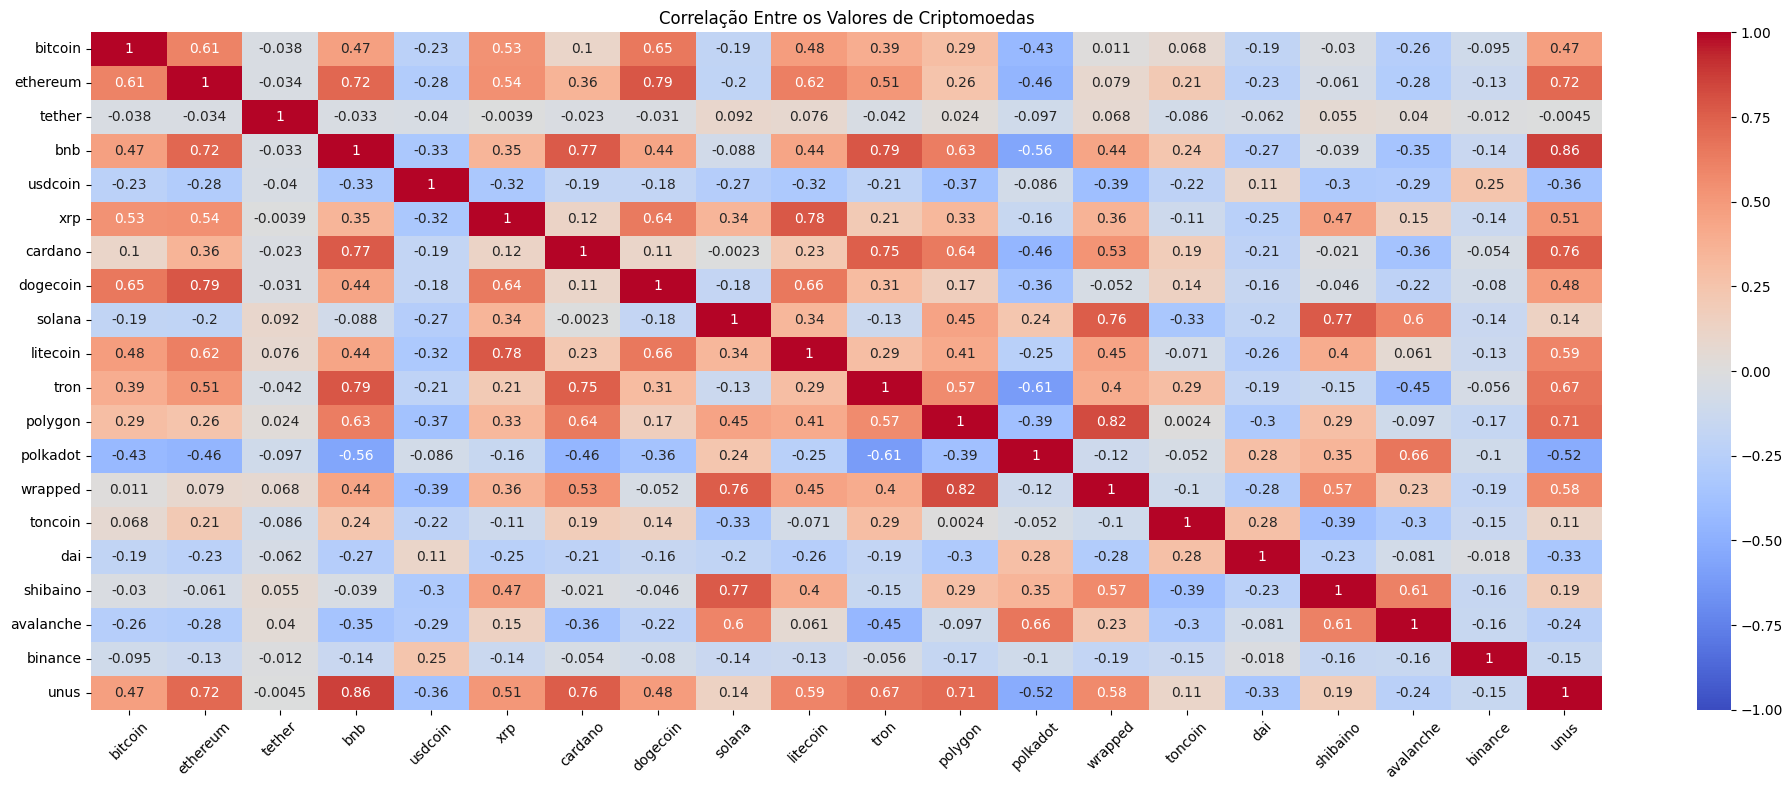

In [34]:
# Configurando o mapa de calor:
plt.figure(figsize=(20, 8))
sns.heatmap(correlacao_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# Configurando os eixos:
plt.title('Correlação Entre os Valores de Criptomoedas')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Exibindo o mapa de calor:
plt.show()

# Preparação de Dados para o SQL Server

## Extração do Arquivo .csv

In [43]:
moedas_puras=[bitcoin,ethereum,tether,bnb,usdcoin,xrp,
                          cardano,dogecoin,solana,litecoin,tron,
                          polygon,polkadot,wrapped,toncoin,dai,
                          shibaino,avalanche,binance,unus]

for df in moedas_puras:
    df['timestamp'] = df['timestamp'].apply(lambda x: x.split("T")[0])
    df['timestamp'] = df['timestamp'].apply(lambda x: x.replace("-", "/"))

In [ ]:
copy = copy.drop('Ano', axis=1)

In [39]:

copy['Data'] = copy['Data'].dt.strftime('%Y/%m/%d')

In [41]:
copy.to_csv('CriptoDB.csv', index=False)
copy

,Moeda,Data,Abertura,Alta,Baixa,Fechamento,Volume,marketCap
0,bitcoin,2010/07/13,0.108547,0.317349,0.251667,0.278197,132.398527,3.414605e+05
1,bitcoin,2010/07/19,0.376898,0.399870,0.330199,0.354749,2741.816665,1.225899e+06
2,bitcoin,2010/07/25,0.333678,0.374312,0.309596,0.329796,7437.734926,1.159079e+06
3,bitcoin,2010/08/01,0.333401,0.342405,0.247036,0.289204,12412.742228,1.036267e+06
4,bitcoin,2010/08/07,0.292528,0.320539,0.242366,0.285299,12556.758870,1.039821e+06
...,...,...,...,...,...,...,...,...
14499,unus,2023/06/13,3.507162,3.518760,3.479496,3.493372,606298.740000,3.249255e+09
14500,unus,2023/06/15,3.514311,3.545116,3.486941,3.503439,883420.540000,3.258531e+09
14501,unus,2023/06/17,3.523351,3.552641,3.504524,3.517301,697342.320000,3.271342e+09
14502,unus,2023/06/19,3.514382,3.559455,3.511937,3.527018,674703.170000,3.280335e+09


# Referências

1. [Today's Cryptocurrency Prices by Market Cap](https://coinmarketcap.com/)

2. [BlockChain.com](https://www.blockchain.com/explorer/charts/market-price?timespan=all)

3. [Dados de Trading by Binance](https://www.binance.com/pt-BR/markets/trading_data)

4. [Trading View](https://www.tradingview.com/chart/llqJ4PKS/)

5. [Melhores criptomoedas para abril de 2023: análise e projeções](https://coinext.com.br/blog/melhores-criptos-abril-2023)

6. [As criptomoedas mais promissoras para 2023, segundo analistas](https://www.infomoney.com.br/mercados/as-criptomoedas-mais-promissoras-para-2023-segundo-analistas/)

7. [Conheça as empresas que ajudaram a criar o ‘inverno cripto’ de 2022](https://einvestidor.estadao.com.br/criptomoedas/empresas-invesrno-cripto-2022/)

8. [FTX: crise abala o mundo cripto e reforça o debate sobre regulação](https://einvestidor.estadao.com.br/criptomoedas/ftx-crise-criptomoedas-bitcoin-ethereum-regulacao/)

9. [Mesmo com The Merge, ethereum deve ter ano difícil. Entenda as razões](https://einvestidor.estadao.com.br/criptomoedas/the-merge-ethereum-criptomoeda-investimentos/)

10. [5 criptomoedas para investir em 2023, segundo especialistas](https://einvestidor.estadao.com.br/criptomoedas/5-criptomoedas-para-investir-em-2023/)

11. [5 criptomoedas promissoras para 2023](https://foxbit.com.br/blog/5-criptos-promissoras-para-2023/)

12. [Criptomoedas: falência da FTX pode indicar o fim?](https://www.bbc.com/portuguese/geral-64055518)

13. [Bitcoin tem pior mês desde falência da FTX e cai 7,5%; retomada naufragou?](https://www.infomoney.com.br/onde-investir/bitcoin-tem-pior-mes-desde-falencia-da-ftx-e-cai-75-retomada-naufragou/)

14. [FTX teve falência 'mais rápida' da história dos EUA, diz Departamento de Justiça](https://exame.com/future-of-money/ftx-teve-falencia-mais-rapida-da-historia-dos-eua-diz-departamento-de-justica/)

15. [Silicon Valley Bank’s parent company files for bankruptcy](https://www.theguardian.com/business/2023/mar/17/silicon-valley-bank-parent-company-bankruptcy)

16. [Parent Company of Silicon Valley Bank Files for Bankruptcy](https://www.nytimes.com/2023/03/17/business/svb-silicon-valley-bank-bankruptcy.html)

17. [Silicon Valley Bank's parent company cut off from bank's records](https://www.reuters.com/business/finance/silicon-valley-banks-parent-company-cut-off-banks-records-2023-03-20/)

18. [Get Ready For Ethereum’s Shanghai Upgrade](https://www.forbes.com/advisor/investing/cryptocurrency/ethereum-shanghai-upgrade/#:~:text=The%20Shanghai%20Upgrade%20Aims%20to%20Boost%20Liquidity&text=%E2%80%9CAn%20investor%20can%20stake%20some,investor%20choosing%20to%20hold%20bonds)

19. [Crypto & Blockchain Section by Forbes](https://www.forbes.com/crypto-blockchain/?sh=4aa888ff2b6e)
 
20. [Ethereum Scaling Company StarkWare Quadruples Valuation To $8 Billion Amid Bear Market](https://www.forbes.com/sites/ninabambysheva/2022/05/25/ethereum-scaling-company-starkware-quadruples-valuation-to-8-billion-amid-bear-market/?sh=62794e726699)

21. [Bitcoin Bank Custodia Sues Federal Reserve, Demanding Decision On Master Account](https://www.forbes.com/sites/michaeldelcastillo/2022/06/07/bitcoin-bank-custodia-sues-federal-reserve-demanding-decision-on-master-account/?sh=6af9675f5f72)

22. [Notícias sobre Criptomoedas pela Exame](https://exame.com/noticias-sobre/criptomoedas/)

23. [Bitcoin atinge maior preço em 12 meses com interesse de grandes empresas em cripto](https://exame.com/future-of-money/bitcoin-preco-hoje-23-junho-2023-supera-30-mil/)

24. [Preços de criptomoedas pelo CoinBase](https://www.coinbase.com/pt/price/bitcoin)

25. [Preço Histórico do Bitcoin por ano - Preço do Bitcoin de 2009 até 2021](https://livecoins.com.br/preco-historico-do-bitcoin//)

26. [Money Times - últimas notícias do mercado financeiro](https://www.moneytimes.com.br/)

27. [Mineração de criptomoedas com placas de vídeo deixa de ser lucrativa após atualização da Ethereum](https://exame.com/future-of-money/mineracao-de-criptomoedas-com-placas-de-video-deixa-de-ser-lucrativa-apos-atualizacao-da-ethereum/)

28. [Portal do Bitcoin](https://portaldobitcoin.uol.com.br/)

29. [O que é capitalização de mercado?](https://www.coinbase.com/pt/learn/crypto-basics/what-is-market-cap)

30. [Capitalização de mercado do Bitcoin supera a da gigante de pagamentos Visa pela 3ª vez](https://br.cointelegraph.com/news/bitcoin-market-cap-flips-payments-giant-visa-for-the-3rd-time)

31. [Market cap do Bitcoin e criptomoedas: o que é e como funciona?](https://blog.bitpreco.com/market-cap-do-bitcoin-e-criptomoedas-que-e-e-como-funciona/)

32. [A verdade sobre a correlação de preços das criptomoedas: quão perto o ETH segue o BTC?](https://br.cointelegraph.com/news/truth-about-crypto-price-correlation-how-closely-does-eth-follow-btc)

33. [5 Most Stable Cryptocurrency In 2023](https://www.outlookindia.com/business-spotlight/5-most-stable-cryptocurrency-in-2023-news-262986)

34. [What Is a Stablecoin?](https://www.coindesk.com/learn/what-is-a-stablecoin/#:~:text=A%20stablecoin%20is%20a%20type,to%20maintain%20a%20stable%20price.&text=A%20%E2%80%9Cstablecoin%E2%80%9D%20is%20a%20type,gold%2C%20to%20stabilize%20its%20price)

35. [O que é o halving do Bitcoin?](https://www.infomoney.com.br/guias/halving-do-bitcoin/)

36. [O que é o halving do Bitcoin e como ele afeta o mercado da criptomoeda](https://www.infomoney.com.br/mercados/o-que-e-o-halving-do-bitcoin-e-como-ele-afeta-o-mercado-da-criptomoeda/)

37. [Satoshi — Saiba O Que É e Como Converter](https://www.novadax.com.br/entendendo-criptomoedas/satoshi-saiba-o-que-e-e-como-converter/)

38. [Bitcoin: dos US$ 20 mil aos US$ 3 mil e o que aconteceu com a revolução das criptomoedas em 2018?](https://www.infomoney.com.br/mercados/bitcoin-dos-us-20-mil-aos-us-3-mil-o-que-aconteceu-com-a-revolucao-das-criptomoedas-em-2018/)

_______________________________________________________________________________________________________________________